In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [3]:
font_s = 10
font_w = "bold"
    
def plot_histogram(df, fig_size, score, reference, query, window):
    fig=plt.figure(figsize=fig_size, facecolor='w')
#     plt.ylim(0,2500)
    plt.xscale('symlog', base=2)
    bin_range = range(min(df[score]), max(df[score]))
    sns.histplot(data=df, x=score, kde=False, bins=bin_range)
#     plt.xticks([-0.55,0,1,2,3,5,10,20,40,100,300,1000,2000,5000], fontsize = 12)
    plt.xticks([-0.55,0,1,2,3,5,10,20,30,50,120,350,1000,2000], fontsize = font_s)
    plt.xlim(-0.55,2000)
    
    plt.yticks(fontsize = font_s)
    fig.axes[0].xaxis.set_major_formatter(ScalarFormatter())
#     plt.title(f'reference: {reference}, query: {query}, window: {window}')
    plt.xlabel(score + f', {reference}, query: {query}, window: {window}', fontsize = font_s, fontweight=font_w)
    plt.ylabel('Count', fontsize = font_s, fontweight=font_w)
    sns.despine(offset=5)

def plot_histogram_by_chr(df, fig_size, score, reference, query, window):
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.ylim(0,70)
    plt.xscale('symlog', base=2)
    bin_range = range(min(df[score]), max(df[score]))
    sns.histplot(data=df, x=score, kde=True, bins=bin_range,
                hue="seqname", element="step")
    plt.xticks([-0.55,0,1,2,3,5,10,20,40,100,300,1000,2000,5000], fontsize = font_s)
    plt.yticks(fontsize = font_s)
    fig.axes[0].xaxis.set_major_formatter(ScalarFormatter())
    plt.title(f'reference: {reference}, query: {query}, window: {window}', fontsize = font_s, fontweight=font_w)
    plt.xlabel(score, fontsize = font_s, fontweight=font_w)
    plt.ylabel('Count', fontsize = font_s, fontweight=font_w)
    sns.despine(offset=5)

def plot_scatter_by_chr(df, fig_size, score, reference, query, window, chromosome):
    fig=plt.figure(figsize=fig_size, facecolor='w')
    x_lim=int(max(df['end_scaled'])+1)
    plt.yscale('symlog', base=2)
    sns.scatterplot(data=df, x='end_scaled',y=score, s=25, alpha = 0.6, palette="dark")
    fig.axes[0].yaxis.set_major_formatter(ScalarFormatter())
    plt.title(f'{chromosome}, reference: {reference}, query: {query}, window: {window}', fontweight=font_w)
    plt.ylabel('Variations', fontsize = font_s, fontweight=font_w)
    plt.xlabel('Chromosome (Mbp)', fontsize = font_s, fontweight=font_w)
    plt.yticks(fontsize = font_s)
    xticks = np.arange(0, x_lim , step=10)
    plt.xticks(xticks, fontsize = font_s)
    plt.ylim(0,1500)
    plt.xlim(0, x_lim)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    sns.despine(offset=5)

In [6]:
score = 'variations'
reference = 'symattis'
query = 'ventricosaCGB116981'
window = '50000'
chromosome='chr2A'
path=f'/Volumes/quirozj/00_kmers/pangenome/01_IBS_output/{reference}/'
# path=f'/Volumes/quirozj/00_kmers/monococcum/01_IBS_output/{reference}/'
# path=f'/Volumes/watseq/kmer_agis/jf_tauschii/01_IBS_output/{reference}/'
# path=f'/Volumes/watseq/kmer_agis/jf_tauschii/01_IBS_output/{reference}/'

In [5]:
in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
# 'BW_01001_stanley_50000.tsv.gz'
in_file

,seqname,start,end,total_kmers,observed_kmers,variations,kmer_distance
0,chr1A,0,50000,49846,35086,553,12627
1,chr1A,49969,99969,49793,28138,702,15102
2,chr1A,99938,149938,49556,27366,707,15594
3,chr1A,149907,199907,49797,32707,736,12813
4,chr1A,199876,249876,49483,36074,627,10964
...,...,...,...,...,...,...,...
299299,chrUn,956606536,956656536,27834,26762,64,1207
299300,chrUn,956656505,956706505,27783,26866,44,878
299301,chrUn,956706474,956756474,27702,27041,32,626
299302,chrUn,956756443,956806443,27733,25833,98,1690


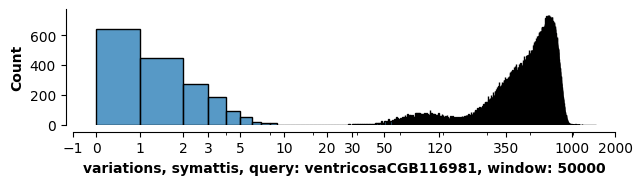

In [7]:
fig_size=(25, 4)
fig_size=(7, 1.5)
plot_histogram(in_file, fig_size, score, reference, query, window)

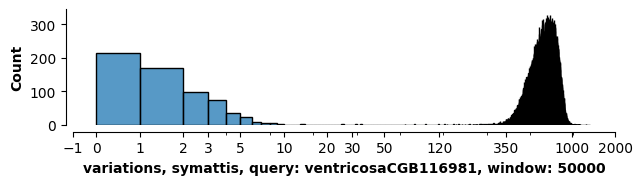

In [14]:
by_chr_df = in_file[in_file['seqname'].str.contains('A')]
plot_histogram(by_chr_df, fig_size, score, reference, query, window)

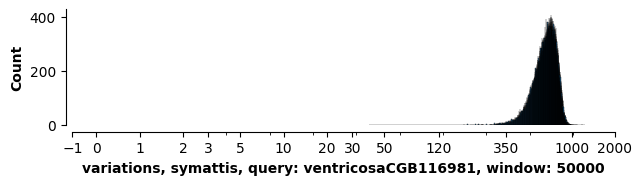

In [15]:
by_chr_df = in_file[in_file['seqname'].str.contains('B')]
plot_histogram(by_chr_df, fig_size, score, reference, query, window)

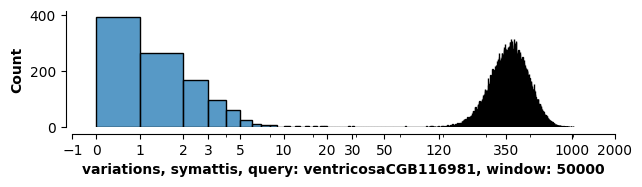

In [16]:
by_chr_df = in_file[in_file['seqname'].str.contains('D')]
plot_histogram(by_chr_df, fig_size, score, reference, query, window)

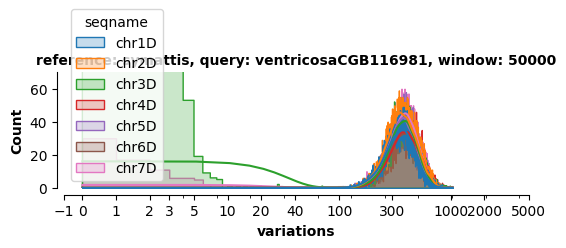

In [17]:
# fig_size=(25, 4)
# fig_size=(7, 1.5) This was for the individual comparison size
fig_size=(6, 1.5)
score = 'variations'
by_chr_df = in_file[in_file['seqname'].str.contains('D')]
plot_histogram_by_chr(by_chr_df, fig_size, score, reference, query, window)

In [96]:
def plot_scatter_by_chr(df, fig_size, score, reference, query, window, chromosome):
    x_lim=int(max(df['end_scaled'])+1)
    fig_size = ((x_lim/70),1.4)
    
    font_s = 10
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.yscale('symlog', base=2)
    sns.scatterplot(data=df, x='end_scaled',y=score, s=5, alpha = 0.6, color='slategray')
    fig.axes[0].yaxis.set_major_formatter(ScalarFormatter())
#     plt.title(f'{chromosome}, reference: {reference}, query: {query}, window: {window}', fontweight=font_w)
    plt.ylabel('Variations', fontsize = font_s, fontweight=font_w)
    plt.xlabel(f'{chromosome} (Mbp) {reference}, query: {query}, window: {window}', fontsize = font_s, fontweight=font_w)
    plt.yticks([0,2,10, 30, 120,350, 1000], fontsize = font_s)
#     xticks = np.arange(0, x_lim , step=10)
#     plt.xticks(xticks, fontsize = font_s)
    plt.xticks(list(range(0,1000,100)), fontsize = font_s)
#     plt.ylim(0,1500)
    plt.xlim(0, x_lim)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    sns.despine(offset=5)

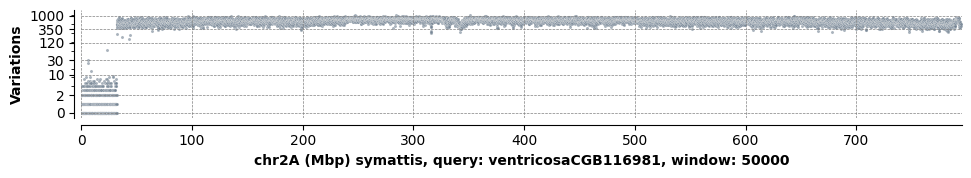

In [97]:
fig_size=(10, 1.3)
by_chr_df = in_file[in_file['seqname'].str.contains(chromosome)]
chromosomes = by_chr_df['seqname'].unique().tolist()

chromosomes=['chr2A']
for chromosome in chromosomes:
#     in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
    individual_chr = in_file[in_file['seqname'].str.contains(chromosome)].copy()
    individual_chr['end_scaled'] = (individual_chr['end']/1000000).round(1)
    plot_scatter_by_chr(individual_chr, fig_size, score, reference, query, window, chromosome)

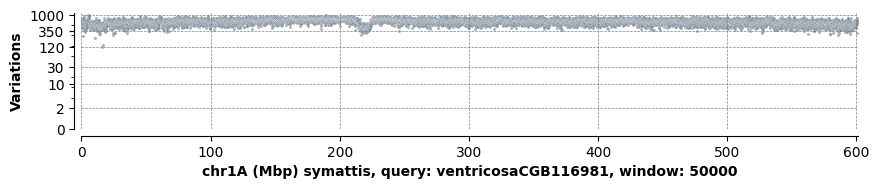

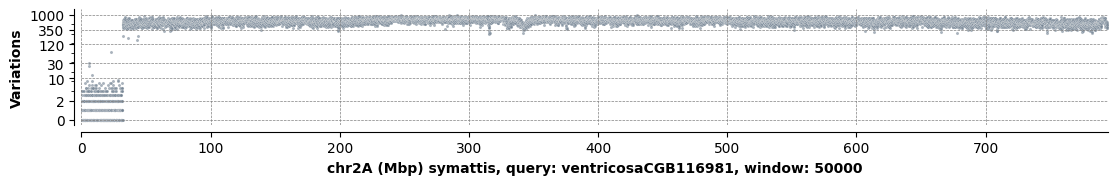

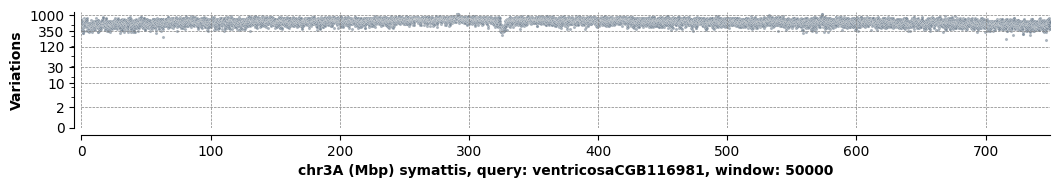

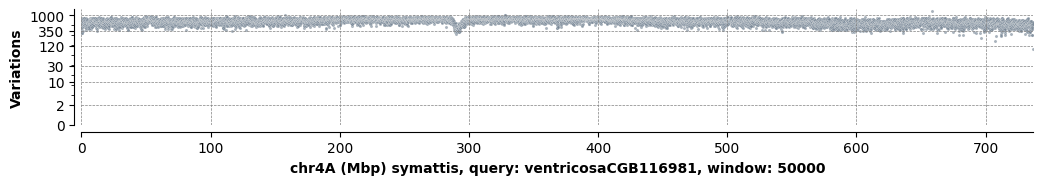

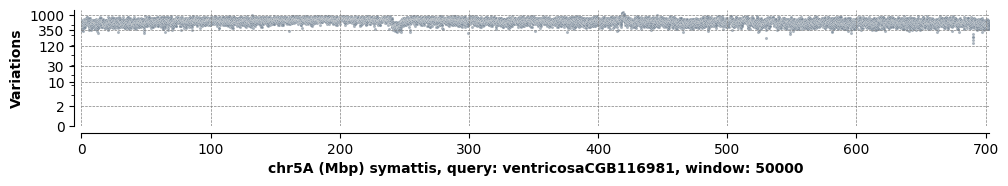

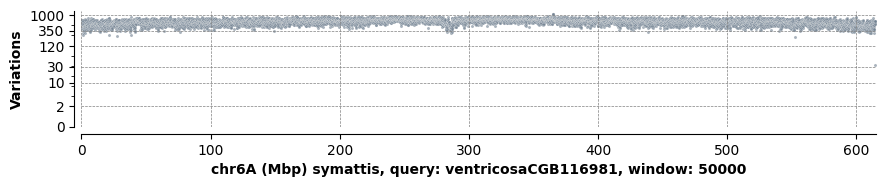

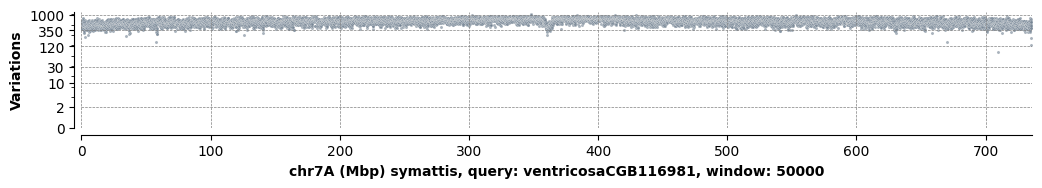

In [23]:
fig_size=(35, 3)

by_chr_df = in_file[in_file['seqname'].str.contains('A')]
chromosomes = by_chr_df['seqname'].unique().tolist()


for chromosome in chromosomes:
#     in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
    individual_chr = in_file[in_file['seqname'].str.contains(chromosome)].copy()
    individual_chr['end_scaled'] = (individual_chr['end']/1000000).round(1)
    plot_scatter_by_chr(individual_chr, fig_size, score, reference, query, window, chromosome)

In [100]:
def plot_scatter_by_chr(df, fig_size, score, reference, query, window, chromosome):
    x_lim=int(max(df['end_scaled'])+1)
    fig_size = ((x_lim/80),1.5)
    
    font_s = 10
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.yscale('symlog', base=2)
    sns.scatterplot(data=df, x='end_scaled',y=score, s=5, alpha = 0.6, color='slategray')
    fig.axes[0].yaxis.set_major_formatter(ScalarFormatter())
#     plt.title(f'{chromosome}, reference: {reference}, query: {query}, window: {window}', fontweight=font_w)
    plt.ylabel('Variations', fontsize = font_s, fontweight=font_w)
    plt.xlabel(f'{chromosome} (Mbp) {reference}, query: {query}, window: {window}', fontsize = font_s, fontweight=font_w)
    plt.yticks([0,2,10, 30, 120,350, 1000], fontsize = font_s)
#     xticks = np.arange(0, x_lim , step=10)
#     plt.xticks(xticks, fontsize = font_s)
    plt.xticks(list(range(0,1000,100)), fontsize = font_s)
#     plt.ylim(0,1500)
    plt.xlim(0, x_lim)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    sns.despine(offset=5)

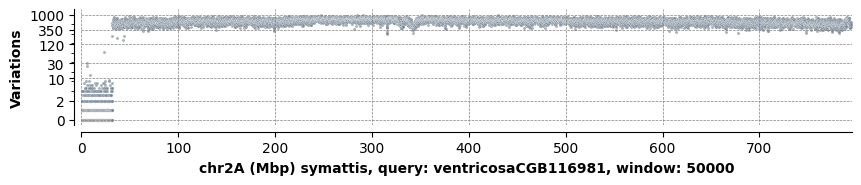

In [101]:
fig_size=(10, 1.3)
by_chr_df = in_file[in_file['seqname'].str.contains(chromosome)]
chromosomes = by_chr_df['seqname'].unique().tolist()

chromosomes=['chr2A']
for chromosome in chromosomes:
#     in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
    individual_chr = in_file[in_file['seqname'].str.contains(chromosome)].copy()
    individual_chr['end_scaled'] = (individual_chr['end']/1000000).round(1)
    plot_scatter_by_chr(individual_chr, fig_size, score, reference, query, window, chromosome)

In [69]:
font_s = 10
font_w = "bold"

def plot_histogram_by_chr(df, fig_size, score, reference, query, window):
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.ylim(0,400)
    plt.xscale('symlog', base=2)
    bin_range = range(min(df[score]), max(df[score]))
    ax = sns.histplot(data=df, x=score, kde=False, bins=bin_range, hue="seqname", element="step",legend=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.2), title=None, fontsize = 8)
    
    plt.xticks([-0.55,0,1,2,3,5,10,20,30,50,120,350,1000,2000], fontsize = 7)
    plt.xlim(-0.55,2000)
    plt.yticks(fontsize = font_s)
    fig.axes[0].xaxis.set_major_formatter(ScalarFormatter())
#     plt.title(f'reference: {reference}, query: {query}, window: {window}', fontsize = 9)
    plt.xlabel(score + f', {reference}, query: {query}, window: {window}', fontsize = font_s, fontweight=font_w)
    plt.ylabel('Frequency', fontsize = font_s, fontweight=font_w)
    sns.despine(offset=5)

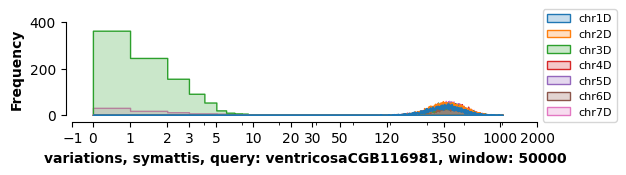

In [98]:
fig_size=(6, 1.2)
by_chr_df = in_file[in_file['seqname'].str.contains('D')]
plot_histogram_by_chr(by_chr_df, fig_size, score, reference, query, window)

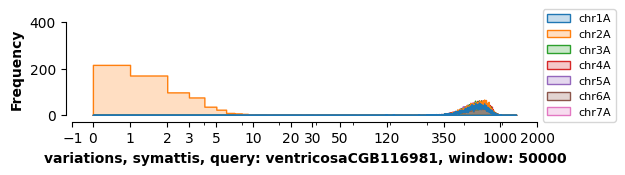

In [99]:
# fig_size=(6, 1.5)
by_chr_df = in_file[in_file['seqname'].str.contains('A')]
plot_histogram_by_chr(by_chr_df, fig_size, score, reference, query, window)

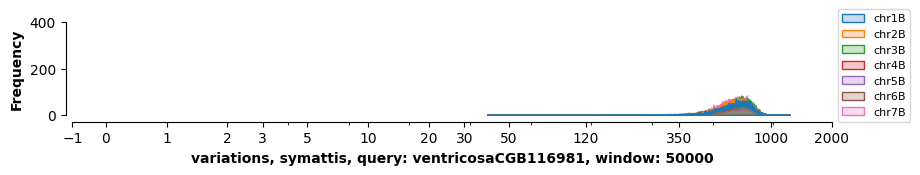

In [86]:
# fig_size=(6, 1.5)
by_chr_df = in_file[in_file['seqname'].str.contains('B')]
plot_histogram_by_chr(by_chr_df, fig_size, score, reference, query, window)